## Step 1: Read and View Data 

In [1]:
# importing 
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Read in the data and view for any abnormalities
games = pd.read_csv('/Users/angeneris/Desktop/integrated_project_1/games.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
# Data cleaning- checking for any issues with the data 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Issues found: 

- Lots of null values, and not all columns match the amount of null values
- Year of release should be a datetime object, currently is float 
- Critic score should be int, currently is float 
- User score should be float, is object 
<br>



## Step 2: Data Cleaning

In [3]:
# Changing columns to lowercase and saving back to games 
games.columns = games.columns.str.lower()

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Dropping all null values from 'year_of_release' first because this column is extremely important to the analysis in this project. I'm also dropping them because there isn't another meaningful way to display this data alternatively if we proceed with the null values. 
<br>

- Why are the values missing? <br>
The values may be missing from the year_of_release because they are either so old or new that they may not have been processed correctly. We can find out more about this by reviewing all the other column data that shows up when we view a NaN year_of_release

<br> 
We will also cut out the rest of the null values for most of the columns to match the exact number of non- null values as year_of_release. The following columns will continue with null values that will be changes to a placeholder: 'critic_score', 'user_score' and 'rating'. These columns offer a bit more flexibility with continuing with null values.

In [4]:
# List of columns to clean by dropping null values
columns_to_clean = ['year_of_release', 'name', 'platform', 'genre', 'eu_sales', 'jp_sales', 'other_sales']

# Dropping null values from specified columns
games = games.dropna(subset=columns_to_clean)

games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Looks good, all columns except for 'critic_score', 'user_score' and 'rating' now have 16444 non-null values. 

<br> 
Next, we'll move on to cleaning the column 'critic_score'
Then 'user_score' and finally, 'rating'

<br> 

- Why are there missing values?<br>
In these columns, the missing values have a more obvious reason- they just don't have a rating/ score yet. This could either be because the rating system started after the tracking of this data or because the rating has yet to processed or has never been completed. We can find more about these differences by reviewing just these columns with the year_of_release column to see if there are any patterns.

In [5]:
# Converting 'critic_score' to integer and handling missing values
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce').astype('Int64')

# Converting 'user_score' to float and handling missing values
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Converting year_of_release to int as datetime may be unecessary with only the year given

games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# Filling missing values with placeholder -1 for ease of filtering later 
cols_to_fill = ['user_score', 'critic_score', 'rating']
games= games.fillna(value={'user_score': -1, 'critic_score': -1, 'rating': 'no rating'})

# Checking 
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [6]:
# Checking that there are no outliers in the data for 'critic_score' and 'user_score'
# critic_score should have a max of 100 and user_score max of 10
games[['critic_score','user_score']].max()

critic_score    98.0
user_score       9.7
dtype: Float64

In [7]:
# Creating a new column for total_revenue. This will combine sales revenue from all regions and add a new column to the dataframe
games['total_revenue'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,no rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,no rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,no rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,no rating,0.01


In [8]:
# Checking 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,no rating,31.38


The data has now been processed and is ready for analysis. 
<br>

## Step 3: Data Analysis 

#### Groping games by release year 

In [9]:
# Creating a dataframe for the amount of games released each year 
years = games.groupby('year_of_release').size().reset_index(name= 'games_released')
years

,year_of_release,games_released
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Looking at this dataframe above, it's clear that there was a 'boom' and a 'bust' period for video game sales by their year of release. The following data will be referred to as $['value']million USD 
<br> 

**1980 - 1982** <br> 
Sales Increase: The jump from the first game release year to the second "1980 - 1981" is understandable, as gaming became the next big thing and that trend seemed to last about 2 years before dropping again in 1983. 
<br> 

**1983 - 1990** <br> 
Sales Flucuate: The sales are sporadic in this period, could be due to changes in consumer behavior and devleopers testing out new games. Sales range from 16 with the highest point being 21 in 1986. 
<br>  

**1991 - 1994** <br> 
Sales Increase: Sales increase conservatively until they hit a boom, when sales double from 60 in 1993 to 121 in 1994.
<br> 

**1995 - 2002** <br> 
Sales Increase: Sales increase year after year at a significant level. 
<br> 

**2003 - 2004** <br> 
Sales Drop: Sales drop but not by much- almost stagnat in this short period. 
<br> 

**2005 - 2009** <br> 
Sales Increase: Sales pick up and are higher than ever: An almost entirely steady increase in sales year by year. 
<br> 

**2010 - 2016** <br> 
Sales Drop: There is a clear significant and steady decrease in sales year after year from this point forward. This suggest a strong change in the market or sales of this company. Although, this dataset may not give the full picture of 2016 data, this does match the trend seen above. 
<br> 

Sales drop all the way from $1,255million USD in 2010 to $502million USD  in 2016. 
<br>

The current data is trending towards a decline in sales and there is no suggestion from the data that this will increase without drastic market changes or company marketing and strategy.

##### Grouping Revenue by Platform 

In [10]:
# Grouping total_sales by platform and viewing the most popular first 
platform_revenue = games.groupby('platform')['total_revenue'].sum().reset_index(name='total_revenue').sort_values(by='total_revenue', ascending=False)
platform_revenue.head(5)

,platform,total_revenue
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


The most popular gaming platform within this dataset is PS2	with a total revenue of $1,233.56 million USD. We will continue analysis using this platform for a distribution model.

In [11]:
# Visually checking the distribution of total_revenue by year_of_release
ps2_sales = games[games['platform']=='PS2'].groupby('year_of_release')['total_revenue'].sum().reset_index(name='total_revenue')
ps2_sales

,year_of_release,total_revenue
0,2000,39.17
1,2001,166.43
2,2002,205.38
3,2003,184.31
4,2004,211.81
5,2005,160.66
6,2006,103.42
7,2007,75.99
8,2008,53.90
9,2009,26.40


From the above dataframe, it appears that there are only notable sales between 2000 - 2011. 

**The PS2 Platform peaked in popularity between 2001- 2005**

The platform had a significant boom after it's first release year then mostly continued to climb till sales began to drop in 2005, followed by a more drastic decline in 2007. This matches the trend expected as the PS3 was released in 2006. Consumers might have heard the news of this release around 2005 and started anticipating the following release. By 2010, it is extremely clear that the gaming system has in fact been replaced.

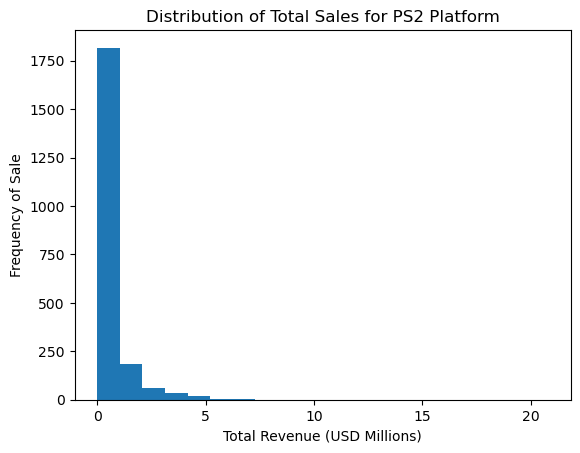

In [12]:
# Grouping PS2 data to plot a distribution 
ps2_data = games[games['platform'] == 'PS2']

# Plot distribution of total_revenue
plt.hist(ps2_data['total_revenue'], bins=20)  
plt.xlabel('Total Revenue (USD Millions)') 
plt.ylabel('Frequency of Sale') 
plt.title('Distribution of Total Sales for PS2 Platform')  
plt.show()

This distribution shows a trend towards budget games, or games that didn't bring in the highest revenue, but produced the most sales by far. As game revnue increases, there are less and less frequency of sales. 

#### Popularity of Platforms Over Time

In [13]:
# Aggregating total sales, first year released, and latest year released for each platform
platform_stats = games.groupby('platform').agg({'total_revenue': ['count','sum'], 'year_of_release': ['min', 'max']}).reset_index()

# Renaming column
platform_stats.columns = ['platform', 'total_units_sold', 'total_revenue', 'first_year_released', 'latest_year_released']

# Sorting by total sales and selecting top 10 platforms
top_10_platforms = platform_stats.sort_values(by='total_units_sold', ascending=False).head(10)

top_10_platforms

,platform,total_units_sold,total_revenue,first_year_released,latest_year_released
16,PS2,2127,1233.56,2000,2011
4,DS,2121,802.78,1985,2013
17,PS3,1306,931.34,2006,2016
26,Wii,1286,891.18,2006,2016
28,X360,1232,961.24,2005,2016
19,PSP,1193,289.53,2004,2015
15,PS,1190,727.58,1994,2003
13,PC,957,255.76,1985,2016
6,GBA,811,312.88,2000,2007
29,XB,803,251.57,2000,2008


Above are the Top 10 performing platforms in sales of all time. This doesn't mean that platforms that didn't make the cut were less popular at their respective times, but limiting the data to the top 10 platforms this way will still provide a lot of value. Viewing the 'first_year_released' shows that the gaming platform, Nintendo DS, with data from it's first released games appearing in 1985, still made it to the Top 10. That's significant. 
<br>

The **oldest** game platforms with highest sales and revenue are:
- Nintendo DS (DS)
- Playstation (PS)
- Playstation 2 (PS2)


The **top 5** game platforms of all time with both the highest total units sold and highest revenue:
- Playstation 2 (PS2)
- Nintendo DS (DS)
- Playstation 3 (PS3)
- Wii (Wii)
- XBOX 360 (X360)

The **top 5** game platforms of all time with the highest *total revenue* are:
- Playstation 2 (PS2)
- XBOX 360 (X360)
- Playstation 3 (PS3) 
- Wii (Wii)
- Nintendo DS (DS)

This comparison shows the top platforms and shows the significance of Playstation 2, which ranks the highest for both revenue and total units sold.
Other noticeable insights: 
- Although Nintendo DS ranks 2nd highest among total units sold, it ranked lowest among the top 5 in revenue. This may be either due to it's age skewing the sales data or the fact that it just sells more, but cheaper games. 
- Playstation 3 is consistent in 3rd place and the Playstation brand is the only one listed twice amongst top platforms.
- Wii and Xbox are almost tied, with an almost identical total units sold. Xbox may sell slightly more expensive games to produce their higher total revenue, as they have less total units sold than Wii, but released earlier in 2005. 


In [14]:
# Creating a new column to view the period of relvancy of each popular platform 
platform_stats['relevant_period'] =  platform_stats['latest_year_released'] - platform_stats['first_year_released']
platform_stats.sort_values(by='total_units_sold', ascending=False).head(10)

,platform,total_units_sold,total_revenue,first_year_released,latest_year_released,relevant_period
16,PS2,2127,1233.56,2000,2011,11
4,DS,2121,802.78,1985,2013,28
17,PS3,1306,931.34,2006,2016,10
26,Wii,1286,891.18,2006,2016,10
28,X360,1232,961.24,2005,2016,11
19,PSP,1193,289.53,2004,2015,11
15,PS,1190,727.58,1994,2003,9
13,PC,957,255.76,1985,2016,31
6,GBA,811,312.88,2000,2007,7
29,XB,803,251.57,2000,2008,8


From the above dataframe, there is a noticeable trend in the period of relevancy column 'relevant_period'. 
<br>

**The top platforms almost all had a relevant period of 11 or 10 years.** 

The mean of all platform relevancy periods is most likely to be around that number.

In [15]:
print(f"The mean period of relevancy for all platforms is: {platform_stats['relevant_period'].mean():.2f} years")

The mean period of relevancy for all platforms is: 7.61 years


This suggests that gaming platforms have an average relavant period of almost 8 years before the next gaming platform takes over.

#### Preparing Data for Forecasting

Moving forward, we will continue using data from the 10 platforms with the latest latest_year_released values. This ensures that we are only viewing data trends from relevant game platforms that have either released their latest game in the year 2016 or will be releasing it in 2016.
<br>

This is important in forecasting trends for the following year because the data will potentially show patterns that can benefit the 2017 planning. 

In [16]:
# Viewing the latest platforms 
latest_platfroms = platform_stats[platform_stats['latest_year_released']>=2015] 
latest_platfroms.sort_values(by='total_units_sold', ascending=False)

,platform,total_units_sold,total_revenue,first_year_released,latest_year_released,relevant_period
17,PS3,1306,931.34,2006,2016,10
26,Wii,1286,891.18,2006,2016,10
28,X360,1232,961.24,2005,2016,11
19,PSP,1193,289.53,2004,2015,11
13,PC,957,255.76,1985,2016,31
2,3DS,512,257.81,2011,2016,5
20,PSV,429,53.81,2011,2016,5
18,PS4,392,314.14,2013,2016,3
30,XOne,247,159.32,2013,2016,3
27,WiiU,147,82.19,2012,2016,4


- Sales by total units sold and revenue are dominated by PS3, Wii and Xbox360. <br>
Their relevancy in sales continues to be strong. <br>

- Total sales are also high for PSP, almost as high as Xbos360 but the total revenue is only a fraction of the revenue of Xbox360. <br> 
Both platforms first and latest release were around the same time so this is a huge difference in revenue suggesting that PSP games are being sold at a fraction of the price or that higher ticket Xbox360 games are selling more. 
<br>
- Sales by total units sold and revenue for PC games are pretty similar to PSP. <br>
This shows that PC games, with the highest relevancy period of 31 years, don't seem to be going anywhere. 

#### Analysis Using Latest Platforms Expected to be Relevant in 2017 

In [17]:
# Box plot for global sales for the latest platforms by platform  



In [18]:
# Average sales by platform for all games 

Are there significant differences in sales?  

In [19]:
# Group data for latest platforms by critic_score and user_score, make sure to ignore '-1' placeholders

In [20]:
# Build scatter plot and calculate the correlation between reviews and sales

Keeping your conclusions in mind, compare the sales of the same games on other platforms.


In [21]:
# Plot general distribution of games by genre

 What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

## Step 4: Creating a User Profile for Each Region

For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

## Step 5: Test Hypotheses

### Testing Hypothesis to Determine Patterns for Average User Ratings 

H0: The null hypothesis is that the average user ratings of the Xbox One and PC platforms are equal
<br>
HA: The alternative hypothesis is that the average user ratings of the Xbox One and PC platforms are not equal.

The following code will provide more information:

In [22]:
# Test Average user ratings of the Xbox One and PC platforms are the same. 
# Set the alpha threshold value yourself.

H0: The null hypothesis is that the average user ratings for the Action and Sports genres are equal.
<br>
HA: The alternative hypothesis is that the average user ratings for the Action and Sports genres 
are not equal.

The following code will provide more information:

In [23]:
# Test Average user ratings for the Action and Sports genres are different.
# Set the alpha threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses 

—What significance level you chose to test the hypotheses, and why

## Step 6: General Conclusion

Format: Use code and markdown Apply formatting and add headings.

#### Final Conclusions

>write conclusion here